In [4]:
#TASK 1
import pandas as pd, scipy, numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB


ds = pd.read_csv('weathertemp.csv')
x = ds.iloc[:,0:2].values
y = ds.iloc[:,2].values

le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])
y = le.fit_transform(y)
print("Weather", x[:,0])
print("Temp:", x[:,1])
print("Play:", y)

model = GaussianNB()
model.fit(x,y)
predict = model.predict([[0,1]])
print("Predicted Value:",predict)


Weather [2 2 0 1 1 1 0 2 2 1 2 0 0 1]
Temp: [1 1 1 2 0 2 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]
Predicted Value: [1]


In [5]:
#TASK 2
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


ds = pd.read_csv('dermatology_database_1.csv', na_values='?')
new_ds = ds.fillna(ds.mean(), inplace=True)
ds['age'] = ds['age'].astype(int)
# print(ds.head(50))
X = ds.drop('class', axis=1)
Y = ds['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=42)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.7, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.8, random_state=42)

model = GaussianNB()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
Y_pred1 = model.predict(X_test1)
Y_pred2 = model.predict(X_test2)
print("Predicted Value:",len(y_pred))

CM = confusion_matrix(y_test, y_pred)
CM = confusion_matrix(y_test1, y_pred1)
CM = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, cmap="Blues")
plt.show()

main_lst = []
for i in range(5,20):
    lst = []
    scores = cross_val_score(model, x, y, cv=i)
    lst.extend([scores.mean(),i])
    main_lst.append(lst)
print(main_lst)

max_value = 0.0
max_i = None

for i in main_lst:
    if i[0] > max_value:
        max_value = i[0]
        max_i = i

print(max_i)

Predicted Value: 686


ValueError: Found input variables with inconsistent numbers of samples: [220, 686]

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64
Predicted Value: 686
Predicted Value: 961
Predicted Value: 1235
Accuracy 1.0
Accuracy 0.9947970863683663
Accuracy 0.9967611336032388


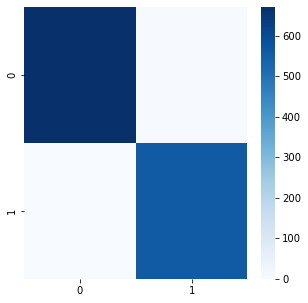

[[0.9978128732581286, 5], [0.9963577976965704, 6], [0.9970845481049563, 7], [0.9963492792057663, 8], [0.9970808011313687, 9], [0.9963503649635037, 10], [0.9970850439882697, 11], [0.9963513857106534, 12], [0.9970765083972631, 13], [0.9963556851311954, 14], [0.9970775601210384, 15], [0.9970844733242135, 16], [0.9970860566448801, 17], [0.9970760233918128, 18], [0.996345029239766, 19]]
[0.9978128732581286, 5]


In [4]:
#TASK 3
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


ds = pd.read_csv('BankNote_Authentication.csv')

print(ds.isna().sum())
x = ds.drop('class',axis=1)
y = ds['class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.7)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.9)


model = SVC(kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred1 = model.predict(X_test1)
y_pred2 = model.predict(X_test2)
print("Predicted Value:",len(y_pred))
print("Predicted Value:",len(y_pred1))
print("Predicted Value:",len(y_pred2))
accuracy = accuracy_score(y_test, y_pred)
accuracy1 = accuracy_score(y_test1, y_pred1)
accuracy2 = accuracy_score(y_test2, y_pred2)

print("Accuracy", accuracy)
print("Accuracy", accuracy1)
print("Accuracy", accuracy2)

CM = confusion_matrix(y_test, y_pred)
CM= confusion_matrix(y_test1, y_pred1)
CM = confusion_matrix(y_test2, y_pred2)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, cmap="Blues")
plt.show()

main_lst = []
for i in range(5,20):
    lst = []
    scores = cross_val_score(model, x, y, cv=i)
    lst.extend([scores.mean(),i])
    main_lst.append(lst)
print(main_lst)

max_value = 0.0
max_i = None

for i in main_lst:
    if i[0] > max_value:
        max_value = i[0]
        max_i = i

print(max_i)
plt.show()
